In [161]:
import read_csv
import numpy as np
import matplotlib.pyplot as plt
import test,refractive

In [162]:
def Transmission(lam, r = 1, optdick = 1):
    lam = lam*10**-9
    delphi = (4*np.pi/lam) * optdick
    F = ((4*r)/(1-r)**2)
    return 1/ (1+(F*(np.sin(delphi/2))**2))

def reflectance(n1,n2):
    return ((n1-n2)/(n1+n2))

In [163]:
def Gallium(x):
    x = x/1000
    return (1+2.60+1.75/(1-(0.256/x)**2)+4.1/(1-(17.86/x)**2))**.5

def Sapphire(x):
    x = x/1000
    return (1+1.4313493/(1-(0.0726631/x)**2)+0.65054713/(1-(0.1193242/x)**2)+5.3414021/(1-(18.028251/x)**2))**.5

def InN(x):
    return 2.9

def InGaN(wavelength,x):
    b = 3.6
    return InN(wavelength) + (1-x)*Gallium(wavelength) - b*x*(1-x)

In [164]:
Gallium(1200)

2.3269828158265473

In [165]:
file_path = r"InGaN.csv"  # Replace with the path to your CSV file
columns = read_csv.read_csv(file_path)
x_data =  np.array(columns[0])

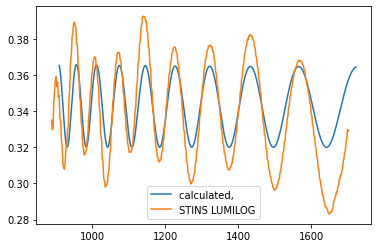

In [166]:
T1 = []
for x in x_data:
    T1.append(Transmission(x, r = reflectance(Gallium(x),1)*reflectance(Gallium(x),Sapphire(x)) , optdick = 3.5*10**-6 * Gallium(x)))
T1 = np.array(T1)

plt.plot(x_data+21,-0.2*np.log(T1)+0.32, label="calculated, ")
plt.plot(x_data, columns[1], label="STINS LUMILOG")
plt.legend()

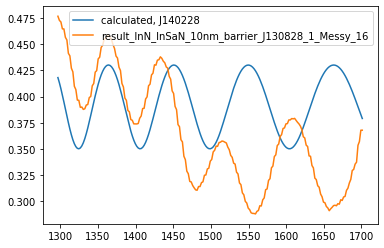

In [193]:
#j130828
T6 =  []
for x in x_data:
    T6.append(Transmission(x, r = reflectance(InGaN(x,0.9),1)*reflectance(Gallium(x),Sapphire(x)) , optdick = (3.5*10**-6 * Gallium(x) + 0.255*10**-6 * InN(x) + 0.85*10**-6 * InGaN(x,0.9) )))
T6 = np.array(T6)

l = 200
z = 0
plt.plot(x_data[l:],  -0.3* np.log(T6)[l:]+ 0.35, label="calculated, J140228")
plt.plot(x_data[z:][l:], columns[2][l:], label="result_InN_InSaN_10nm_barrier_J130828_1_Messy_16")
plt.legend()

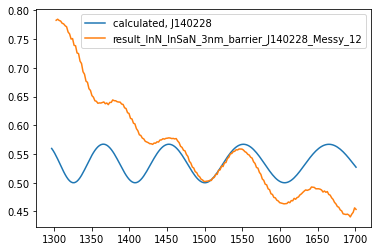

In [195]:
# J140228
T4 =  []
for x in x_data:
    T4.append(Transmission(x, r = reflectance(Gallium(x),1)*reflectance(Gallium(x),Sapphire(x)) , optdick = (3.5*10**-6 * Gallium(x) + 0.55*10**-6 * InN(x) + 0.55*10**-6 * InGaN(x,0.9) )))
T4 = np.array(T4)

l = 200
z = 3
plt.plot(x_data[l:], -0.3*np.log(T4)[l:]+0.5, label="calculated, J140228")
plt.plot(x_data[z:][l:], columns[3][l:], label="result_InN_InSaN_3nm_barrier_J140228_Messy_12")
plt.legend()

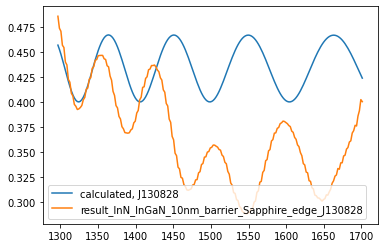

In [196]:
#j130828
T5 =  []
for x in x_data:
    T5.append(Transmission(x, r = reflectance(Gallium(x),1)*reflectance(Gallium(x),Sapphire(x)) , optdick = (3.5*10**-6 * Gallium(x) + 0.255*10**-6 * InN(x) + 0.85*10**-6 * InGaN(x,0.9) )))
T5 = np.array(T5)

l = 200
z = 0
plt.plot(x_data[l:],  -0.3* np.log(T5)[l:]+ 0.4, label="calculated, J130828 ")
plt.plot(x_data[z:][l:], columns[4][l:], label="result_InN_InGaN_10nm_barrier_Sapphire_edge_J130828")
plt.legend()

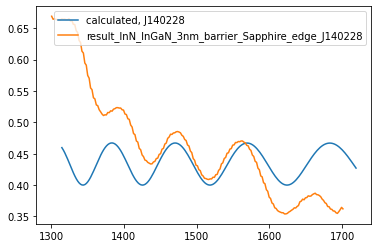

In [184]:
# J140228
T4 =  []
for x in x_data:
    T4.append(Transmission(x, r = reflectance(Gallium(x),1)*reflectance(Gallium(x),Sapphire(x)) , optdick = (3.5*10**-6 * Gallium(x) + 0.55*10**-6 * InN(x) + 0.55*10**-6 * InGaN(x,0.9) )))
T4 = np.array(T4)

l = 200
z = 2
plt.plot(x_data[l:]+18, -0.3*np.log(T4)[l:]+0.4, label="calculated, J140228")
plt.plot(x_data[z:][l:], columns[5][l:], label="result_InN_InGaN_3nm_barrier_Sapphire_edge_J140228")
plt.legend()

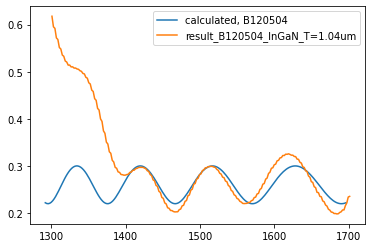

In [204]:
# B120504
T3 = []
for x in x_data:
    T3.append(Transmission(x,r = reflectance(InGaN(x,0.9),1)*reflectance(Gallium(x),Sapphire(x)), optdick = Gallium(x) * 3.5*10**(-6) + 1.04*10**(-6) * InGaN(x,0.9)))
l = 200
z = 2
plt.plot(x_data[l:]-5, -0.3*np.log(T3)[l:]+0.22, label="calculated, B120504")   
plt.plot(x_data[z:][l:], columns[6][l:], label = "result_B120504_InGaN_T=1.04um")
plt.legend()

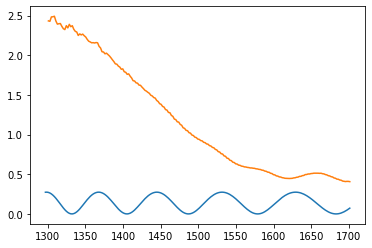

In [206]:
T7 = []
for x in x_data:
    T7.append(Transmission(x,r = reflectance(Gallium(x),Sapphire(x))*reflectance(InN(x),1), optdick = Gallium(x) * 3.7*10**(-6) + 1.4*10**-6 * InN(x)))
l = 200
z = 2
plt.plot(x_data[l:], -np.log(T7)[l:], label="calculated, B111205")
plt.plot(x_data[z:][l:], columns[7][l:], label = "result_B111205_InN_center")

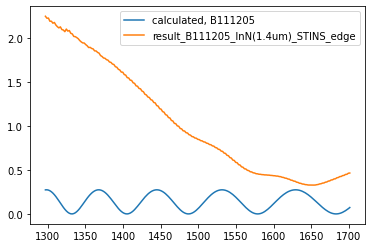

In [208]:
T8 = []
for x in x_data:
    T8.append(Transmission(x,r = reflectance(Gallium(x),Sapphire(x))*reflectance(InN(x),1), optdick = Gallium(x) * 3.7*10**(-6) + 1.4*10**-6 * InN(x)))
l = 200
z = 0
plt.plot(x_data[l:], -np.log(T8)[l:], label="calculated, B111205")
plt.plot(x_data[z:][l:], columns[8][l:], label = "result_B111205_InN(1.4um)_STINS_edge")
plt.legend()


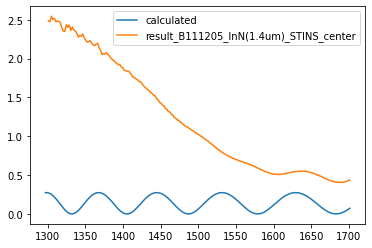

In [211]:
T9 = []
for x in x_data:
    T9.append(Transmission(x,r = reflectance(Gallium(x),Sapphire(x))*reflectance(InN(x),1), optdick = Gallium(x) * 3.7*10**(-6) + 1.4*10**-6 * InN(x)))
l = 200
z = 2
plt.plot(x_data[l:], -np.log(T9)[l:], label="calculated")   
plt.plot(x_data[z:][l:], columns[9][l:], label="result_B111205_InN(1.4um)_STINS_center")
plt.legend()

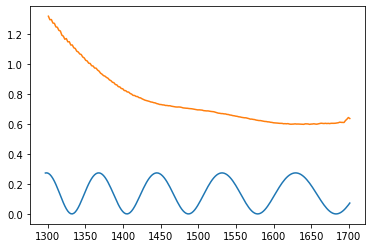

In [212]:
T10 = []
for x in x_data:
    T10.append(Transmission(x,r = reflectance(Gallium(x),Sapphire(x))*reflectance(InN(x),1), optdick = Gallium(x) * 3.7*10**(-6) + 1.4*10**-6 * InN(x)))
l = 200
z = 2
plt.plot(x_data[l:], -np.log(T10)[l:], label="calculated")
plt.plot(x_data[z:][l:], columns[10][l:], label="result_B111205_InN(1.4um)_Sapphire_edge")